# Time Series and Forecasting using FBProphet

## Introduction

Time series analysis is a statistical technique that deals with time-dependent data. It is an important area of study in many domains such as finance, economics, engineering, and environmental science, among others. Time series data can be used to identify patterns and trends, model relationships between variables, and make predictions about the future.

Forecasting is the process of using historical data to make predictions about future events. Time series forecasting involves using past observations to estimate future values of a time series variable. Forecasting is an important tool for decision-making in many areas, including finance, supply chain management, and marketing.

There are many techniques for time series forecasting, including traditional statistical methods such as **ARIMA** and **exponential smoothing**, as well as machine learning methods such as neural networks and support vector regression. In recent years, the **Prophet forecasting** tool developed by Facebook has gained popularity due to its ease of use and accurate results.

In this notebook, we will provide an overview of time series analysis and forecasting, as well as an introduction to the Prophet forecasting tool. We will cover the steps involved in building a time series forecasting model using Prophet, including data preparation, model training and evaluation, and making predictions. We will also provide some tips and best practices for working with time series data and interpreting the results of a forecasting model.

## Time Series and Forecasting Analysis

- Time series analysis is the study of data collected over time. It involves investigating the patterns and trends in the data to extract meaningful insights, and to make predictions about the future based on historical patterns. Time series analysis is an important tool in many fields, including finance, economics, engineering, and the natural sciences.
- Forecasting is a specific type of time series analysis that involves using statistical techniques to predict future values of a time series based on historical data. The goal of forecasting is to make accurate predictions that can be used to inform decision making in a wide range of fields, from business and finance to public policy and scientific research.



## Time Series Forecasting Workflow

Here's a typical workflow for time series forecasting using Prophet:

1. **Data preparation**: Collect and clean the historical data that you want to analyze. You need to have at least two columns: a timestamp column and a column with the data that you want to forecast.

2. **Time series visualization**: Plot the historical data to see how it changes over time, and to identify any patterns, trends, and seasonality.

3. **Model fitting**: Use Prophet to fit a time series model to your historical data. Prophet is a powerful tool for time series analysis that can handle a wide range of time series patterns, including seasonality, trends, and special events.

4. **Parameter tuning**: Tune the model's hyperparameters to improve its accuracy. This includes setting the prior scale for seasonality and trend, and adjusting the uncertainty intervals for the model.

5. **Forecasting**: Use the fitted model to generate forecasts for future time periods. You can specify the number of periods you want to forecast, and Prophet will generate predictions, along with upper and lower bounds that represent the uncertainty in the predictions.

6. **Model evaluation**: Evaluate the accuracy of the model by comparing the predicted values to the actual values for the validation set. You can use a variety of metrics, such as mean absolute error, mean squared error, and root mean squared error, to assess the performance of the model.

7. **Visualization and interpretation**: Visualize the predicted values and the uncertainty intervals to communicate the results to stakeholders. You can also use visualization techniques, such as decomposition plots and partial dependence plots, to understand the underlying patterns in the data and how they contribute to the forecast.

8. **Refinement and iteration**: Refine the model based on the evaluation and interpretation of the results. This may include tweaking the model's hyperparameters or using additional data to improve the accuracy of the forecast.


## Stock Price Forecasting

In [1]:
import yfinance as yf
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt

The data above represents historical daily stock prices for the American multinational technology company, **Apple Inc. (AAPL)**, from **January 1, 2020, to December 31, 2022**. The data includes the date, opening price, highest price, lowest price, closing price, and volume of shares traded for each day. The data is stored in a pandas DataFrame with the date as the index and the six columns representing the different attributes.

This data can be used to build a time series forecasting model using Prophet to predict future stock prices for AAPL.

In [2]:
# set the ticker symbol and start/end dates for the data
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2022-12-31'

# load the data from Yahoo Finance
stock = yf.download(ticker, start=start_date, end=end_date)

# show the first few rows of the data
print(stock.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.449394  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.735313  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.314888  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.970085  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  74.143890  132079200


The code above loads the historical stock price data for Apple Inc. (ticker symbol: AAPL) from Yahoo Finance using the `yf.download` function provided by the yfinance library in Python.

The start_date and end_date variables are set to indicate the start and end dates for the stock price data to be downloaded. In this case, the start date is set to **January 1, 2020**, and the end date is set to **December 31, 2022**.

The `yf.download` function downloads the stock price data from Yahoo Finance and stores it in a Pandas DataFrame called stock. The DataFrame has columns for the date, open price, high price, low price, closing price, and adjusted closing price. The index of the DataFrame is set to the date column.

The code then prints the first few rows of the `stock` DataFrame using the head function to give a preview of the data that has been downloaded.

### EDA

In [3]:
# create a new DataFrame with only the 'Date' and 'Adj Close' columns
df = pd.DataFrame({'ds': stock.index, 'y': stock['Adj Close']}).reset_index(drop=True)

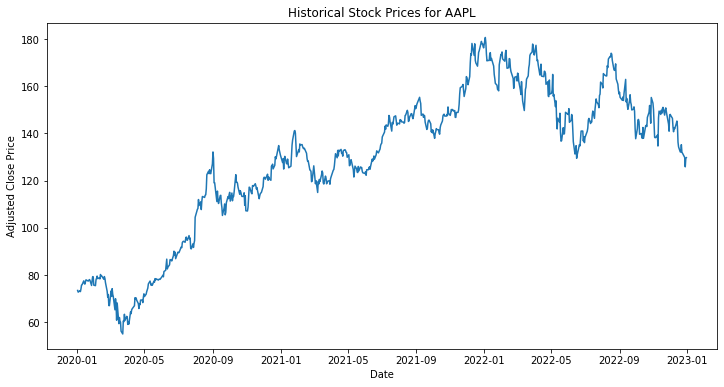

In [4]:
# plot the historical stock prices
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'])
plt.title('Historical Stock Prices for {}'.format(ticker))
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

This code will download the historical stock prices for Apple Inc. (AAPL) from Yahoo Finance, and plot the closing price for each day. You can replace the `ticker`, `start_date`, and `end_date` variables with the desired values for a different stock. The resulting plot should show the historical trend of the closing prices over the selected time period.

### Model Fitting

In [5]:
# create the Prophet model and fit the data
model = Prophet()
model.fit(df)

12:53:20 - cmdstanpy - INFO - Chain [1] start processing
12:53:21 - cmdstanpy - INFO - Chain [1] done processing


In this code, Prophet is first initialized with the `Prophet()` function, which creates a new Prophet object. Then, the `fit()` function is called on the Prophet object and passed in the input data df. The `fit()` function is used to fit the model to the input data and find the best parameters for the model.

Overall, the code creates a Prophet model object and fits it to the input data using the `fit()` function. This trained model can then be used to make predictions on future data.

The algorithm in Prophet consists of a few key components:

1. Trend modeling: A piecewise linear or logistic growth curve is used to model non-periodic changes in the time series. The curve can be adjusted with a changepoint_prior_scale parameter to control the flexibility of the trend.

2. Seasonality modeling: Seasonality can be modeled as daily, weekly, and yearly components. These are represented using Fourier series with a user-specified number of terms, which control the flexibility of the seasonal components.

3. Holidays and special events: The model can include custom holidays and special events that affect the time series, such as national holidays, store closures, or promotional campaigns. These are represented using indicator variables.

4. Error modeling: The errors in the time series can be modeled using a normal distribution with a user-specified scale parameter.

5. Bayesian inference: Prophet uses a Bayesian framework to fit the model to the data. This allows for uncertainty estimates to be calculated, which are useful for generating prediction intervals around the forecast.

Overall, the algorithm in Prophet is designed to be flexible and easy to use, while still providing accurate and reliable forecasts.

### Prediction

In time series forecasting, we often want to make predictions for future time points beyond the range of the original data. In order to do this, we need to create a new dataframe containing the dates or time points for which we want to make predictions. The `make_future_dataframe()` function in Prophet allows us to do this easily. We pass in the number of periods we want to predict into the future, and Prophet will create a new dataframe with the appropriate number of rows and dates. This new dataframe can then be used to make predictions using the fitted model.

In [6]:
# create a DataFrame with the future dates for prediction
future = model.make_future_dataframe(periods=365)

In the code you provided, future is a Pandas DataFrame that contains the future dates for which we want to make predictions. This DataFrame is created using the `make_future_dataframe()` method of the `Prophet` model. The `periods` argument specifies the number of days into the future that we want to predict. In this case, we have set `periods` to 365, which means that we want to make predictions for the next 365 days after the end of our historical data.

The `make_future_dataframe()` method creates a new DataFrame that extends the historical data up to the specified number of future periods. The new DataFrame has the same columns as the historical data, and its index contains both the historical dates and the future dates for which we want to make predictions.

This DataFrame is used as input to the `predict()` method of the `Prophet` model to generate the forecast for the future dates.

In [7]:
# make the predictions
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,65.364738,66.254373,80.718829,65.364738,65.364738,8.144143,8.144143,8.144143,-1.672968,-1.672968,-1.672968,9.817111,9.817111,9.817111,0.0,0.0,0.0,73.508881
1,2020-01-03,65.519962,66.283302,79.968123,65.519962,65.519962,8.029734,8.029734,8.029734,-1.833336,-1.833336,-1.833336,9.863070,9.863070,9.863070,0.0,0.0,0.0,73.549696
2,2020-01-06,65.985633,67.483140,81.221163,65.985633,65.985633,8.377955,8.377955,8.377955,-1.447147,-1.447147,-1.447147,9.825101,9.825101,9.825101,0.0,0.0,0.0,74.363587
3,2020-01-07,66.140857,67.783186,81.875016,66.140857,66.140857,8.339933,8.339933,8.339933,-1.412577,-1.412577,-1.412577,9.752510,9.752510,9.752510,0.0,0.0,0.0,74.480790
4,2020-01-08,66.296080,67.048270,81.888744,66.296080,66.296080,8.304497,8.304497,8.304497,-1.346851,-1.346851,-1.346851,9.651348,9.651348,9.651348,0.0,0.0,0.0,74.600577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2023-12-26,87.337105,70.669503,118.945675,63.742725,110.030274,7.516409,7.516409,7.516409,-1.412577,-1.412577,-1.412577,8.928986,8.928986,8.928986,0.0,0.0,0.0,94.853514
1117,2023-12-27,87.206712,70.438129,120.504939,63.520037,109.980640,7.743654,7.743654,7.743654,-1.346851,-1.346851,-1.346851,9.090504,9.090504,9.090504,0.0,0.0,0.0,94.950366
1118,2023-12-28,87.076319,70.144143,117.820723,63.297349,109.941478,7.574437,7.574437,7.574437,-1.672968,-1.672968,-1.672968,9.247405,9.247405,9.247405,0.0,0.0,0.0,94.650756
1119,2023-12-29,86.945926,70.016945,118.425769,63.074661,109.977776,7.562032,7.562032,7.562032,-1.833336,-1.833336,-1.833336,9.395368,9.395368,9.395368,0.0,0.0,0.0,94.507958


The `forecast` object is a pandas DataFrame containing several columns, including the ds column for the future dates and columns for the predicted values (`yhat`) and upper and lower uncertainty intervals (`yhat_upper` and `yhat_lower`, respectively). 

Additionally, the `forecast` object can be used to plot the predicted values and their corresponding uncertainty intervals, allowing for a visual representation of the predictions. This can be useful for identifying trends, seasonality, and any significant changes or anomalies in the data.

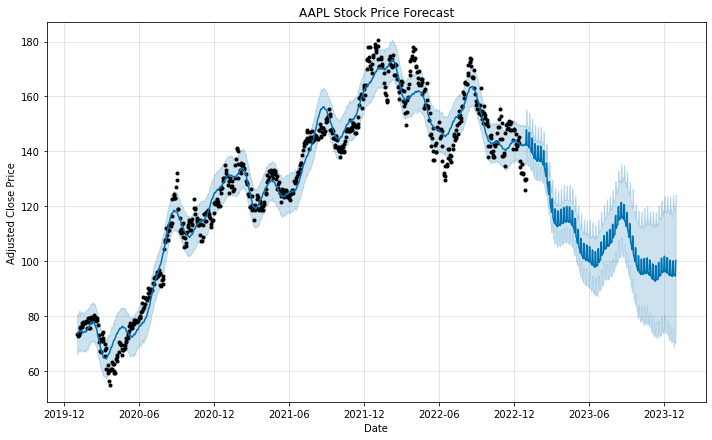

In [8]:
# plot the forecast
model.plot(forecast)
plt.title('AAPL Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

To identify trends, seasonality, and any significant changes or anomalies in the data from the `forecast` object, you can use the built-in `Prophet` plotting functionality.

This will generate a plot with the trend, yearly seasonality, and weekly seasonality components of the forecast, as well as any identified changepoints or anomalies. You can customize the components included in the plot using the `plot_components()` function arguments.

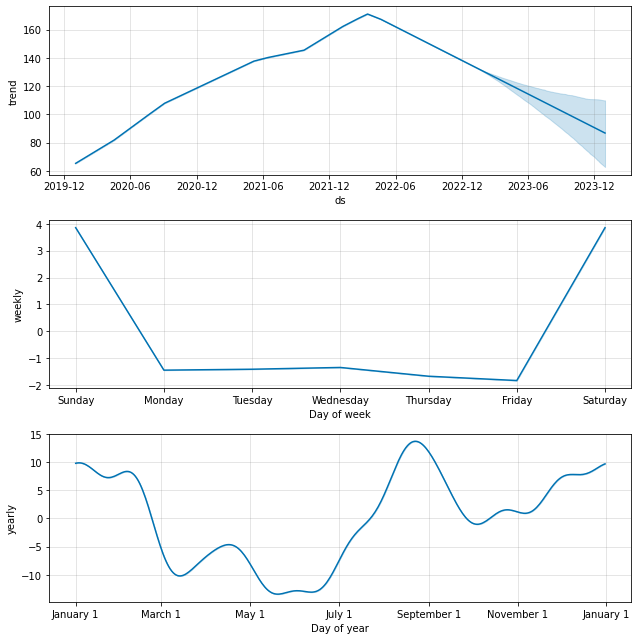

In [9]:
# plot the components of the forecast
model.plot_components(forecast)
plt.show()

The `trend` component represents the overall direction of the stock price over time, while the `yearly seasonality` component shows any regular patterns that repeat on an annual basis. The `weekly seasonality` component, on the other hand, highlights any weekly patterns that occur in the data.

The resulting plot of the components of the forecast shows how each of these components contributes to the overall prediction. It can be useful for understanding the underlying patterns in the data and identifying any potential factors that may be driving changes in the stock price.

## References

- [Official Prophet documentation](https://facebook.github.io/prophet/docs/)
- [Prophet GitHub repository](https://github.com/facebook/prophet)
- [Forecasting Website Traffic with Prophet](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#example-forecasting-website-traffic)
- [Forecasting Stock Prices using Facebook's Prophet Model](https://towardsdatascience.com/forecasting-stock-prices-using-facebooks-prophet-model-9ee1657132b5)
- [Analyzing and Forecasting Stock Prices using Prophet](https://medium.com/@shakasom/analyzing-and-forecasting-stock-prices-using-prophet-f25486d1e628)